# Problem Set 3

In [27]:
import numpy as np
import matplotlib.pyplot as plt


## Lemmings problem
Use a CTMC to model lemmings climbing up and falling down a ladder. A lemming at level i climbs up with rate 1 for i=0,1,...,9 and falls to the ground with rate 1 for i=1,2,...,9. What is the expected time to reach the top starting from the ground

In [40]:
# Rate Matrix Q
a = np.ones(10)
diagele = np.ones(11)*-2

Q = np.zeros(11) + np.diag(a, k=1) + np.diag(diagele)
Q[0,0] = -1
Q[10, :] = 0
Q[1:, 0] = 1

# Q = np.array([
#     [-1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#     [1, -2, 1, 0, 0, 0, 0, 0, 0, 0],
#     [1, 0, -2, 1, 0, 0, 0, 0, 0, 0],
#     [1, 0, 0, -2, 1, 0, 0, 0, 0, 0], 
#     [1, 0, 0, 0, -2, 1, 0, 0, 0, 0], 
#     [1, 0, 0, 0, 0, -2, 1, 0, 0, 0],
#     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], ], dtype='float64')


In [41]:
Q

array([[-0.5,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5, -1. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0. , -1. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. , -1. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. ,  0. , -1. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. , -1. ,  0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  0.5,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  0.5,  0. ,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  0.5,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  0.5],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [47]:
#Starting dist
p0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


time_arr = []
n_trials = 1000
y_arr = []
for i in range(n_trials):
    #Time limit
    T = 10000000

    #Simuate from the uniform U~Unif(0,1)
    U = np.random.uniform()

    #Set the initial value y0 = i where i is the smallest in s.t. the sum of the previous y
    y = 0

    k=0
    t=0
    x_arr = [y]

    while t<T:
        k += 1
        Uk = np.random.uniform()
        t = t + np.log(Uk)/Q[y,y]
        v = np.random.uniform()
        if v <= 0.5: #Drop down
            y = 0
        else:
            y += 1
        
        # y_arr =  np.append(y_arr, y)

        if y == 10: #At the top
            time_arr = np.append(time_arr, t)
            break


(array([572., 248., 117.,  35.,  11.,   7.,   2.,   5.,   2.,   1.]),
 array([1.05990524e+01, 2.66678355e+03, 5.32296805e+03, 7.97915255e+03,
        1.06353370e+04, 1.32915215e+04, 1.59477060e+04, 1.86038905e+04,
        2.12600750e+04, 2.39162595e+04, 2.65724440e+04]),
 <BarContainer object of 10 artists>)

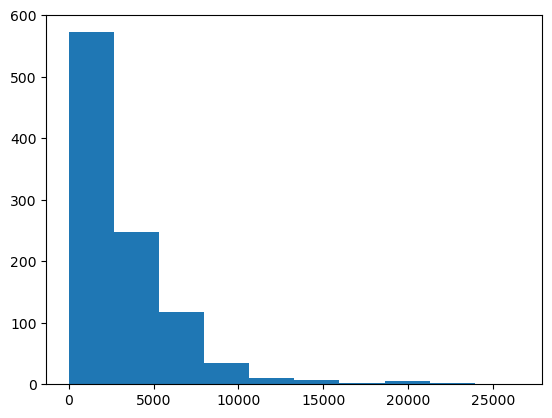

In [48]:
plt.hist(time_arr)

In [49]:
np.mean(time_arr)

3128.9315628488202

In [50]:
np.std(time_arr)

1477.3867580244817